In [4]:


import pandas as pd
import numpy as np
from ast import literal_eval

#importing the data

file_name1="pattern1.txt"
file_name2="pattern2.txt"
file_name3="pattern3.txt"

ifile=open(file_name1, "r")
ifile2=open(file_name2, "r")
ifile3=open(file_name3, "r")

list_files=[ifile,ifile2,ifile3]

    
lines=ifile.readlines()
data=[tuple(line.strip('(),\n').split(',')) for line in lines]
df_ctr = pd.DataFrame.from_records(data, columns =['uid','timestamp','ctr'])

lines=ifile2.readlines()
data=[tuple(line.strip('(),\n').split(',')) for line in lines]
df_count_by_id_ip = pd.DataFrame.from_records(data, columns =['uid','timestamp','impressionId','ip','count_by_id_ip'])


lines=ifile3.readlines()
data=[tuple(line.strip('(),\n').split(',')) for line in lines]
df_count_by_window = pd.DataFrame.from_records(data, columns =['uid','timestamp','count_by_window'])

print(df_ctr.head())

                                      uid   timestamp                 ctr
0    b5d70432-524e-4f91-9dab-b72404735e12  1624334188                 2.5
1  5b8e9454-a3cb-4cfc-8ce0-31adecb1679e13  1624334196                 1.0
2  7ef89d44-ac09-437b-9b40-28584293ae1418  1624334196                 1.0
3  66e6c67b-776c-49a6-8fec-d056d5dc5f6012  1624334206                 1.0
4    9357c2af-bbd8-4859-8114-27b89f350f8b  1624334199  1.6666666666666667


uid          0
timestamp    0
ctr          0
dtype: int64
uid           object
timestamp      int64
ctr          float64
dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


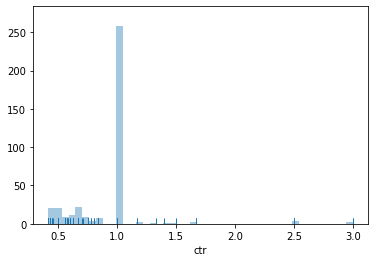

In [53]:
#Some basic visualization
import seaborn as sns
import matplotlib.pyplot as plt

print(df_ctr.isnull().sum())
df_ctr["ctr"] = pd.to_numeric(df_ctr["ctr"])
df_ctr['timestamp'] = df_ctr['timestamp'].astype(int)
df_ctr['uid'] = df_ctr['uid'].astype(str)


df_count_by_window['timestamp'] = df_count_by_window['timestamp'].astype(int)
df_count_by_window['uid'] = df_count_by_window['uid'].astype(str)
df_count_by_window["count_by_window"] = pd.to_numeric(df_count_by_window["count_by_window"])


print(df_ctr.dtypes)
sns.distplot(df_ctr.ctr, kde=False, rug=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


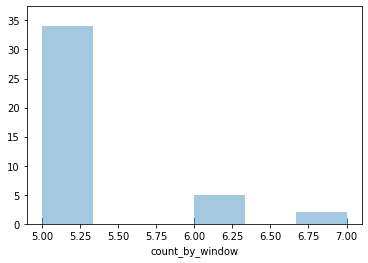

In [6]:
sns.distplot(df_count_by_window.count_by_window, kde=False, rug=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


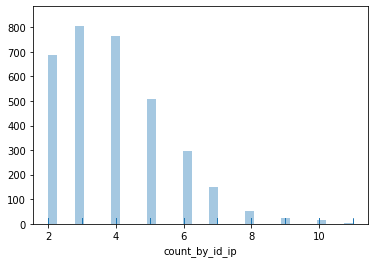

In [7]:
sns.distplot(df_count_by_id_ip.count_by_id_ip,kde=False, rug=True)
plt.show()

In [49]:

#
'''
sns.relplot(
    data=df_ctr.iloc[0:50],
    x="timestamp", y="ctr", col="uid")
'''

'\nsns.relplot(\n    data=df_ctr.iloc[0:50],\n    x="timestamp", y="ctr", col="uid")\n'

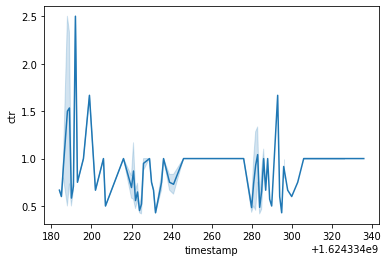

In [45]:
sns.lineplot(data=df_ctr, x="timestamp", y="ctr")


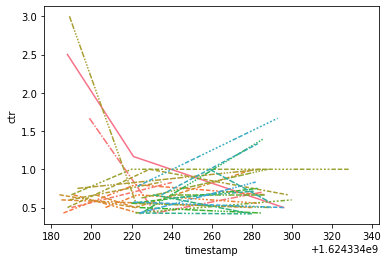

In [51]:
sns.lineplot(data=df_ctr, x="timestamp", y="ctr", hue="uid",style="uid", err_style="bars", ci=68,legend=False)


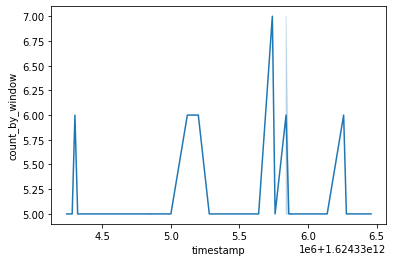

In [56]:
sns.lineplot(data=df_count_by_window, x="timestamp", y="count_by_window")


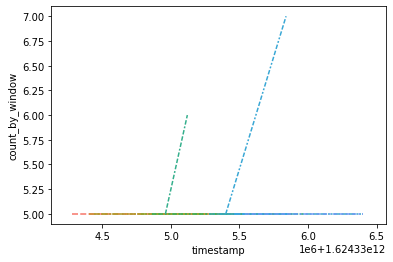

In [54]:
sns.lineplot(data=df_count_by_window, x="timestamp", y="count_by_window", hue="uid",style="uid", err_style="bars", ci=68,legend=False)


In [59]:
df_count_by_window_grouped=df_count_by_window.groupby(['uid']).mean().sort_values(['count_by_window'],ascending=False)


In [60]:
df_count_by_window_grouped

,timestamp,count_by_window
uid,,
992623a3-1494-4f59-aed6-9c7eba4164f5,1624335740000,7.0
9357c2af-bbd8-4859-8114-27b89f350f8b,1624335620000,6.0
cc8a56d9-f297-4eea-a7c9-5e0c1cb9d129,1624335200000,6.0
43fa0ce8-3d46-4def-9197-5506d7c0d02d,1624336260000,6.0
b0f46b71-7335-4a7f-898f-b91854d4cf95,1624334300000,6.0
9ff999d7-0446-483a-a588-d3ec873ade2e,1624335840000,6.0
19bd9f5f-aa65-4858-940e-101f69f3d869,1624335040000,5.5
983caca2-0122-4f7b-97ae-e1ffaab1f3c6,1624335640000,5.0
f387d106-2cc6-42b1-8694-df461d78e76c,1624335580000,5.0


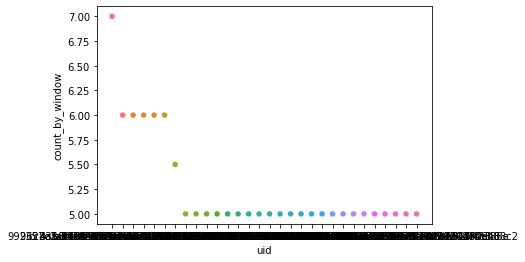

In [62]:


sns.scatterplot(x="uid",
                    y="count_by_window",
                    data=df_count_by_window_grouped,hue="uid",legend=False)

In [41]:
#df_mean = df.groupby('Program', as_index=False).mean().sort(['Value'], ascending=False)[['Program', 'Value']]
df_ctr_grouped=df_ctr.groupby(['uid']).mean().sort_values(['ctr'],ascending=True)


In [42]:
df_ctr_grouped

,ctr
uid,
d4773ea7-4471-41eb-9713-82e77c2ada01,0.416667
014564e5-ac70-4fae-a4c8-3484b1ce8c49,0.424603
08e76afd-c94f-4185-97fc-0e05d8f56ca1,0.428571
5c76829f-86a0-46fc-bec5-41e133385348,0.454545
495f060b-dcef-423a-9773-a4ee6438428f,0.476190
...,...
6b7aa1c9-9080-4380-82f7-5d9042a545a4,1.074074
51581fe7-5715-48c1-bd64-6f4c91690d24,1.500000
b5d70432-524e-4f91-9dab-b72404735e12,1.566667


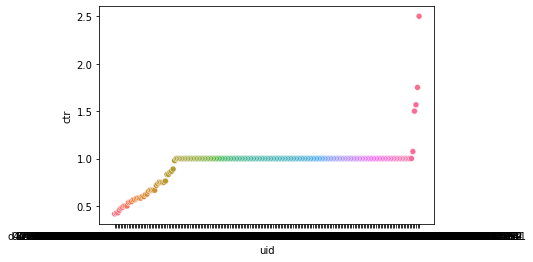

In [43]:



sns.scatterplot(x="uid",
                    y="ctr",
                    data=df_ctr_grouped,hue="uid",legend=False)

#Pour relever les 

# Nouvelle section